In [526]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from Lecture7.logistic_regression import SimpleLogisticRegression

In [527]:
from sklearn.metrics import accuracy_score
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Load and process dataset
load breast_cancer.csv, drop columns "id" and "Unnamed: 32", investigate the dataset, and divide into train and test with 80/20 ratio, map values of "diagnosis" from ("B","M") to (0,1)

In [528]:
original_data = pd.read_csv('breast_cancer.csv')
X = original_data.drop(['id', 'Unnamed: 32'], axis=1)
target_col = 'diagnosis'
X.loc[X[target_col] == 'M', 'diagnosis'] = 1
X.loc[X[target_col] == 'B', 'diagnosis'] = 0
X[target_col] = X[target_col].astype(int)

setting number of clusters

In [529]:
K = 2

We have two very strong outliers, which in future will make serious influence on algorithm and sometimes stick one cluster center and dont let to it to be changed
These are rows 212 and 461
We should delete them

In [530]:
X.drop(212, axis=0, inplace=True)
X.drop(461, axis=0, inplace=True)

In [531]:
print('CORRELATION MATRIX:')
for feature in X.columns.difference([target_col]):
    print(f'Correlation between {feature} and target column: ', X[[feature, target_col]].corr().iloc[1,0])

CORRELATION MATRIX:
Correlation between area_mean and target column:  0.7230194885685689
Correlation between area_se and target column:  0.6543415456204112
Correlation between area_worst and target column:  0.7448380011989271
Correlation between compactness_mean and target column:  0.5942507555534166
Correlation between compactness_se and target column:  0.290603028749923
Correlation between compactness_worst and target column:  0.5926000675832344
Correlation between concave points_mean and target column:  0.7775205070637204
Correlation between concave points_se and target column:  0.40507334289059854
Correlation between concave points_worst and target column:  0.7930748115655999
Correlation between concavity_mean and target column:  0.6964521916907342
Correlation between concavity_se and target column:  0.24916850970137372
Correlation between concavity_worst and target column:  0.658814461765053
Correlation between fractal_dimension_mean and target column:  -0.008297389429912686
Corre

In [532]:
y = X[target_col]
X.drop(target_col, axis=1, inplace=True)

In [533]:
print('Number of malignant diagnosis: ', y.value_counts().loc[0])
print('Number of benign diagnosis: ', y.value_counts().loc[1])

Number of malignant diagnosis:  357
Number of benign diagnosis:  210


In [534]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,14.079187,19.278783,91.631358,648.380776,0.096308,0.104091,0.087907,0.048513,0.181147,0.062823,0.397042,1.216239,2.804511,38.596116,0.007029,0.025424,0.031751,0.011767,0.020500,0.003792,16.213437,25.679894,106.864074,871.779189,0.132395,0.254144,0.271379,0.114266,0.290342,0.084013
std,3.435530,4.298475,23.664895,334.976006,0.014060,0.052719,0.078416,0.038259,0.027434,0.007060,0.241336,0.552502,1.735771,34.823434,0.002996,0.017900,0.030140,0.006152,0.008200,0.002650,4.743557,6.144992,32.934746,548.180273,0.022860,0.157390,0.208266,0.065526,0.061742,0.018048
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.695000,16.170000,75.100000,420.050000,0.086210,0.064710,0.029520,0.020310,0.161900,0.057800,0.232350,0.832400,1.604000,17.850000,0.005163,0.013015,0.015035,0.007631,0.015095,0.002241,13.010000,21.090000,84.095000,514.650000,0.116600,0.146600,0.114450,0.064530,0.250450,0.071465
50%,13.340000,18.840000,86.180000,546.400000,0.095860,0.092420,0.061260,0.033410,0.179200,0.061550,0.323700,1.108000,2.284000,24.440000,0.006369,0.020420,0.025860,0.010910,0.018730,0.003136,14.960000,25.410000,97.650000,684.600000,0.131300,0.211900,0.226400,0.099750,0.282300,0.080060
75%,15.765000,21.790000,103.750000,781.800000,0.105200,0.130350,0.128250,0.073520,0.195650,0.066135,0.475950,1.473500,3.321000,44.935000,0.008135,0.032295,0.041615,0.014710,0.023425,0.004537,18.655000,29.690000,125.050000,1060.000000,0.146050,0.338100,0.381900,0.161350,0.318150,0.092085
max,27.220000,39.280000,182.100000,2250.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,1.509000,4.885000,11.070000,233.000000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,33.130000,49.540000,229.300000,3432.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [535]:
X.mean()

radius_mean                 14.079187
texture_mean                19.278783
perimeter_mean              91.631358
area_mean                  648.380776
smoothness_mean              0.096308
compactness_mean             0.104091
concavity_mean               0.087907
concave points_mean          0.048513
symmetry_mean                0.181147
fractal_dimension_mean       0.062823
radius_se                    0.397042
texture_se                   1.216239
perimeter_se                 2.804511
area_se                     38.596116
smoothness_se                0.007029
compactness_se               0.025424
concavity_se                 0.031751
concave points_se            0.011767
symmetry_se                  0.020500
fractal_dimension_se         0.003792
radius_worst                16.213437
texture_worst               25.679894
perimeter_worst            106.864074
area_worst                 871.779189
smoothness_worst             0.132395
compactness_worst            0.254144
concavity_wo

finding feature which should be rescaled

In [536]:
X_max = X.max()
features_to_rescale = X_max[np.abs(X.max()) > 2].index.tolist()
X[features_to_rescale] = StandardScaler().fit_transform(X[features_to_rescale])


## Implementing KMeans

In [537]:
class KMeans(object):
    def __init__(self, K, metric='L2', max_iter=200, eps=1e-4, center_init='random'):
        self.K = K
        self.max_iter = max_iter
        self.eps = eps
        self.centroids = np.array([])
        self.metric = metric.lower()
        self.center_init = center_init.lower()

        """
        if metric is 'L2' let self.dist be a function that computes euclidian distance between x and y vectors,
        if metric is 'L1' let self.dist be a function that computes manhattan distance between x and y vectors,
        otherwise raise not implemented error
        """
        if self.metric == 'l2':
            self.dist = self.l2_dist
        elif self.metric == 'l1':
            self.dist = self.l1_dist
        else:
            raise NotImplementedError

    def __str__(self):
        return f'KMeans object: metric={self.metric}, center_init={self.center_init}, K={self.K}, max_iter={self.max_iter}, eps={self.eps}'

    def distortion(self, X, r):
        """
        param X: numpy array of shape (M,N)
        param r: numpy array of shape (M), shows to which cluster each row of X belongs
        return: distortion value of the dataset
        """
        sum_ = 0
        for k in range(self.K):
            mask = r[:, k] == 1
            X_k = X[mask]
            sum_ += np.sum(self.dist(X_k, self.centroids[k]))
        print('distortion: ', sum_)
        return sum_

    def init_centroids(self, X):
        """
        :param X: numpy array of shape (M,N)
        """
        """ 
        If centers_init is 'random' initialize self.centroids with random K items from X,
        if it is 'kmeans++' initialize centroids according to the algorithm in 
        http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf page 3,
        otherwise raise not implemented error .
        """
        if self.center_init.lower() == 'random':
            self.centroids = self.random_init(X)
        elif self.center_init.lower() == 'kmeans++':
            self.centroids = self.kmeans_plus_plus_init(X)
        else:
            raise NotImplementedError

    def fit(self, X):
        """
        :param X: numpy array of shape (M,N)
        """
        """ 
        1. Initialize cluster centers using self.init_centroids method
        2. Implement KMeans algorithm and  terminate it when either self.max_iter iterations are performed,
        or the biggest change in cluster centers is smaller than selfk means formula.eps

        The final cluster centers should be saved in self.centroids
        """
        step = 0
        self.init_centroids(X)
        r = self.recalculate_r(X)
        curr_distortion = self.distortion(X, r)

        while step <= self.max_iter:
            r = self.recalculate_r(X)
            self.recalculate_centroids(X, r)

            prev_distortion = curr_distortion
            curr_distortion = self.distortion(X, r)
            if np.abs(prev_distortion - curr_distortion) <= self.eps:
                print(f'Required precision achieved on {step}-th step')
                break

            step += 1
        else:
            print('Maximum iterations run out!')

    def recalculate_centroids(self, X, r):
        for k in range(self.K):
            mask = r[:, k] == 1
            numerator = X[mask].sum(axis=0)
            denominator = r[:, k].sum()
            self.centroids[k] = numerator / denominator

    def recalculate_r(self, X):
        num_rows, num_columns = X.shape
        r = np.zeros(shape=(num_rows, self.K), dtype=int)
        indices = self.find_closest_distances(X, self.centroids)[:, 1].astype('int')
        for i in range(len(indices)):
            r[i, indices[i]] = 1
        return r

    def predict(self, X):
        """
        :param X: numpy array of shape (M,N)
        :return: numpy array of shape (M,)
        """
        """
        using  self.centroids predict to which cluster each datapoint of X belongs, values in returned array
        are integers(id of the cluster). 
        """
        return self.find_closest_distances(X, self.centroids)[:, 1].astype('int')

    def random_init(self, X):
        # for each feature define its boundaries, i.e. minimum and maximum values
        min_boundary = X.min(axis=0)
        max_boundary = X.max(axis=0)

        # return K random vectors of size X.shape[1]
        centroids = np.random.uniform(low=min_boundary, high=max_boundary, size=(self.K, min_boundary.shape[0]))
        return centroids

    def kmeans_plus_plus_init(self, X):
        num_rows, num_columns = X.shape
        # step 1a. Take one center c1, chosen uniformly at random from X
        centroids = np.array(X[np.random.randint(num_rows)])
        centroids = centroids.reshape(-1, len(centroids))

        # step2a.  Take a new center c[i], choosing x ∈ X with probability D(x)**2/sum(D(x)**2)
        for i in range(self.K - 1):
            distances = self.find_closest_distances(X, centroids)[:, 0]
            probabilities = self.get_probabilities(distances)
            max_proba_index = np.argwhere(probabilities == np.amax(probabilities))[0][0]

            # reshape 1d to 2d for appending
            new_centroid = X[max_proba_index].reshape(-1, len(X[max_proba_index]))
            centroids = np.append(centroids, new_centroid, axis=0)
        return centroids

    def get_probabilities(self, distances):
        squared = distances ** 2
        sum_ = np.sum(squared)
        return squared / sum_

    def find_closest_distances(self, X, centroids):
        '''
        :param X:
        :param centroids:
        :return: an array where i-th row is associated with i-th row in X
                 and has two elements: closest distance to centroid and index of that centroid
        '''

        num_rows = X.shape[0]
        closest_distances = np.zeros(shape=(num_rows, 2))

        for i in range(num_rows):
            # array of distances between current point and centroids
            distances = self.dist(centroids, X[i])
            # index of min element in distances assigned to indices array
            min_distance = np.amin(distances)
            closest_distances[i] = min_distance, np.argwhere(distances == min_distance)
        return closest_distances

    def l2_dist(self, X, Y):
        return np.sqrt(np.sum((X - Y) ** 2, axis=1))

    def l1_dist(self, X, Y):
        return np.sum(np.abs(X - Y), axis=1)
    
    

## Cluster the dataset with kmeans, model and predict malignancy of tumors in the test set entries
## 1. Perform clustering using the following hyperparameter pairs
1. metric='L1', center_init='random'
2. metric='L1', center_init='kmeans++'
3. metric='L2', center_init='random'
4. metric='L2', center_init='kmeans++'

## 2. Predict malignancy of tumors in the test set entries using all 4 models trained above, compare their performances.


In [538]:
clf1 = KMeans(K=2, metric='L1', center_init='random')
clf2 = KMeans(K=2, metric='L1', center_init='kmeans++')
clf3 = KMeans(K=2, metric='L2', center_init='random')
clf4 = KMeans(K=2, metric='L2', center_init='kmeans++', eps=1e-05)

In [539]:
print(clf1)
clf1.fit(X.values)
clusters = clf1.predict(X.values)

labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]
print(f'accuracy_score: ', accuracy_score(y, labels))

KMeans object: metric=l1, center_init=random, K=2, max_iter=200, eps=0.0001
distortion:  12184.348772010791
distortion:  4237.7982040976585
distortion:  3695.7603044761636
distortion:  3633.6072439600593
distortion:  3612.413435569223
distortion:  3598.13723774101
distortion:  3596.1051262594005
distortion:  3596.1051262594005
Required precision achieved on 6-th step
accuracy_score:  0.8589065255731922


In [540]:
print(clf2)
clf2.fit(X.values)
clusters = clf2.predict(X.values)

labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]
print(f'accuracy score: ', accuracy_score(y, labels))

KMeans object: metric=l1, center_init=kmeans++, K=2, max_iter=200, eps=0.0001
distortion:  7050.226627455136
distortion:  4070.0425558467805
distortion:  3705.8182561803724
distortion:  3637.247294043026
distortion:  3612.413435569223
distortion:  3598.13723774101
distortion:  3596.1051262594005
distortion:  3596.1051262594005
Required precision achieved on 6-th step
accuracy score:  0.8589065255731922


In [541]:
print(clf3)
clf3.fit(X.values)
clusters = clf3.predict(X.values)

labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]
print(f'accuracy score: ', accuracy_score(y, labels))

KMeans object: metric=l2, center_init=random, K=2, max_iter=200, eps=0.0001
distortion:  4057.94159386928
distortion:  1627.6776616043182
distortion:  1322.1045786720338
distortion:  1238.3221371077848
distortion:  1214.7709762748177
distortion:  1209.69630925633
distortion:  1207.112040091141
distortion:  1207.112040091141
Required precision achieved on 6-th step
accuracy score:  0.8624338624338624


In [542]:
print(clf4)
clf4.fit(X.values)
clusters = clf4.predict(X.values)

labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]
print(f'accuracy score: ', accuracy_score(y, labels))

KMeans object: metric=l2, center_init=kmeans++, K=2, max_iter=200, eps=1e-05
distortion:  1725.6690167566949
distortion:  1498.0515817083538
distortion:  1304.280244647335
distortion:  1233.790782552837
distortion:  1213.8082021319703
distortion:  1209.2607644235163
distortion:  1207.112040091141
distortion:  1207.112040091141
Required precision achieved on 6-th step
accuracy score:  0.8624338624338624


## Fit your implementation of Logistic Regression on the dataset, predict on test set and compare the results with kmeans approach

In [543]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
my_LR = SimpleLogisticRegression(threshold=0.5, lambda_=10, epsilon=1e-5, learning_rate=1e-3, max_steps=500_000)
my_LR.fit(X_train.values, y_train.values)

X_test_array = np.insert(X_test.values, 0, 1, axis=1)

LR_y_pred = my_LR.predict(X_test_array)

step: 1000    error: 1.5738021426332125
step: 2000    error: 0.8035026665095302
step: 3000    error: 0.4097728269216532
step: 4000    error: 0.20842842424372066
step: 5000    error: 0.1053422015698402
step: 6000    error: 0.05252692520170399
step: 7000    error: 0.025482706615093775
step: 8000    error: 0.011643639723885713
step: 9000    error: 0.0045562428204135585
step: 10000    error: 0.0009203138377245068
Gradient Descent converged at 10407-th step


In [544]:
sklearn_LR = LogisticRegression()
sklearn_LR.fit(X_train, y_train)
sklearn_y_pred = sklearn_LR.predict(X_test)

## Analyze the coefficients of fitted logistic regression model, drop 2 most unimportant features and train again Logistic regression and Kmeans with best metric, center_init hyperparameters, evaluate and compare results

In [545]:
coefficients = my_LR.get_beta()[1:]
coefficients.shape

(30,)

In [546]:
arr = np.abs(coefficients)
sorted_ = np.sort(arr)
first_to_drop = np.argwhere(arr == sorted_[0])[0][0]
second_to_drop = np.argwhere(arr == sorted_[1])[0][0]

In [547]:
X_train1 = X_train.drop(X_train.columns[[first_to_drop, second_to_drop]], axis=1)
X_test1 = X_test.drop(X_test.columns[[first_to_drop, second_to_drop]], axis=1)

In [548]:
my_LR.fit(X_train1.values, y_train.values)
X_test_array1 = np.insert(X_test1.values, 0, 1, axis=1)
LR_y_pred1 = my_LR.predict(X_test_array1)

step: 1000    error: 1.3969824496889487
step: 2000    error: 0.6818665275019384
step: 3000    error: 0.3335911685494466
step: 4000    error: 0.16359267432432034
step: 5000    error: 0.08013278770056331
step: 6000    error: 0.038869441043829056
step: 7000    error: 0.018322950590771825
step: 8000    error: 0.008003346455183191
step: 9000    error: 0.0027610891921341363
step: 10000    error: 6.555063669111405e-05
Gradient Descent converged at 10030-th step


In [549]:
clf3.fit(X_train1.values)
clusters = clf3.predict(X_train1.values)

labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(y_train[mask])[0]

distortion:  3382.6828287236694
distortion:  1283.7669160582448
distortion:  1258.4747237032802
distortion:  1231.070473692947
distortion:  1176.2562118060912
distortion:  1106.257280568813
distortion:  1010.8393651295916
distortion:  968.6705885145974
distortion:  959.2273495407908
distortion:  958.2825507627955
distortion:  958.9832842885131
distortion:  958.9832842885131
Required precision achieved on 10-th step


In [550]:
print('Accuracy of my Logistic Regression: ', accuracy_score(y_test, LR_y_pred))
print('Accuracy of my Logistic Regression with dropped 2 unimportant features: ', accuracy_score(y_test, LR_y_pred1))
print('Accuracy of Sklearn Logistic Regressor: ', accuracy_score(y_test, sklearn_y_pred))
print(f'Accuracy of my KMeans: ', accuracy_score(y_train, labels))

Accuracy of my Logistic Regression:  0.9210526315789473
Accuracy of my Logistic Regression with dropped 2 unimportant features:  0.9210526315789473
Accuracy of Sklearn Logistic Regressor:  0.9649122807017544
Accuracy of my KMeans:  0.8631346578366446


## Analyze the coefficients of fitted initial logistic regression model(using all features), select two most important features and train again Logistic regression and Kmeans with best metric, center_init hyperparameters, evaluate and compare results, make the following plot using the test set:

datapoints with cluster centers and decision boundary, color the datapoints according to Kmeans predictions
color the datapoints on which predictions of logistic regression and Kmeans disagree with separate color


In [551]:
coefficients = my_LR.get_beta()[1:]
coefficients

array([ 0.21591752,  0.14484918,  0.22878171,  0.21741979,  0.00918564,
        0.0186314 ,  0.03152413,  0.02866087,  0.01411576, -0.02169038,
       -0.02289293,  0.20045323,  0.21463758,  0.02633172,  0.02418657,
        0.02382454,  0.02601572,  0.02313837,  0.02704143,  0.26147365,
        0.20125975,  0.26929262,  0.25057908,  0.02028457,  0.03604072,
        0.02487542, -0.02175629,  0.01340727])

In [552]:
arr = np.abs(coefficients)
sorted_ = np.sort(arr)
most_important1 = np.argwhere(arr == sorted_[-1])[0][0]
most_important2 = np.argwhere(arr == sorted_[-2])[0][0]
most_important1, most_important2

(21, 19)

In [553]:
# X_train_new = X_train[[X_train.columns[[most_important1, most_important2]]]]
columns = X_train.columns[[most_important1, most_important2]]
X_train2 = X_train[columns]
X_test2 = X_test[columns]

In [554]:
my_LR2.fit(X_train2.values, y_train.values)
X_test_array2 = np.insert(X_test2.values, 0, 1, axis=1)
my_y_pred2 = my_LR2.predict(X_test_array2)

step: 1000    error: 0.0040529176504806586
step: 2000    error: 0.0019982665222126883
step: 3000    error: 0.0008266248522330599
step: 4000    error: 0.00019365255302983275
Gradient Descent converged at 4488-th step


In [555]:
sklearn_LR2 = LogisticRegression()
sklearn_LR2.fit(X_train2, y_train)
sklearn_y_pred2 = sklearn_LR2.predict(X_test2)

In [556]:
clf3.fit(X_train2.values)
clusters2 = clf3.predict(X_train2.values)

labels2 = np.zeros_like(clusters2)
for i in range(2):
    mask = (clusters2 == i)
    labels2[mask] = mode(y_train[mask])[0]

distortion:  664.9554178665244
distortion:  304.4628215347556
distortion:  269.2714308712106
distortion:  239.85348032544897
distortion:  229.15469426665726
distortion:  222.60988017693165
distortion:  219.0558299754372
distortion:  217.77065055232725
distortion:  217.6576104165078
distortion:  217.6576104165078
Required precision achieved on 8-th step


In [557]:
print('Accuracy of my Logistic Regression with 2 most important features: ', accuracy_score(y_test, my_y_pred2))
print('Accuracy of Sklearn Logistic Regressor with 2 most important features: ', accuracy_score(y_test, sklearn_y_pred2))
print(f'Accuracy of my KMeans with 2 most important features: ', accuracy_score(y_train, labels2))

Accuracy of my Logistic Regression with 2 most important features:  0.7017543859649122
Accuracy of Sklearn Logistic Regressor with 2 most important features:  0.6842105263157895
Accuracy of my KMeans with 2 most important features:  0.7284768211920529


In [558]:
clusters_test = clf3.predict(X_test2.values)

labels_test = np.zeros_like(clusters_test)
for i in range(2):
    mask = (clusters_test == i)
    labels_test[mask] = mode(y_test[mask])[0]

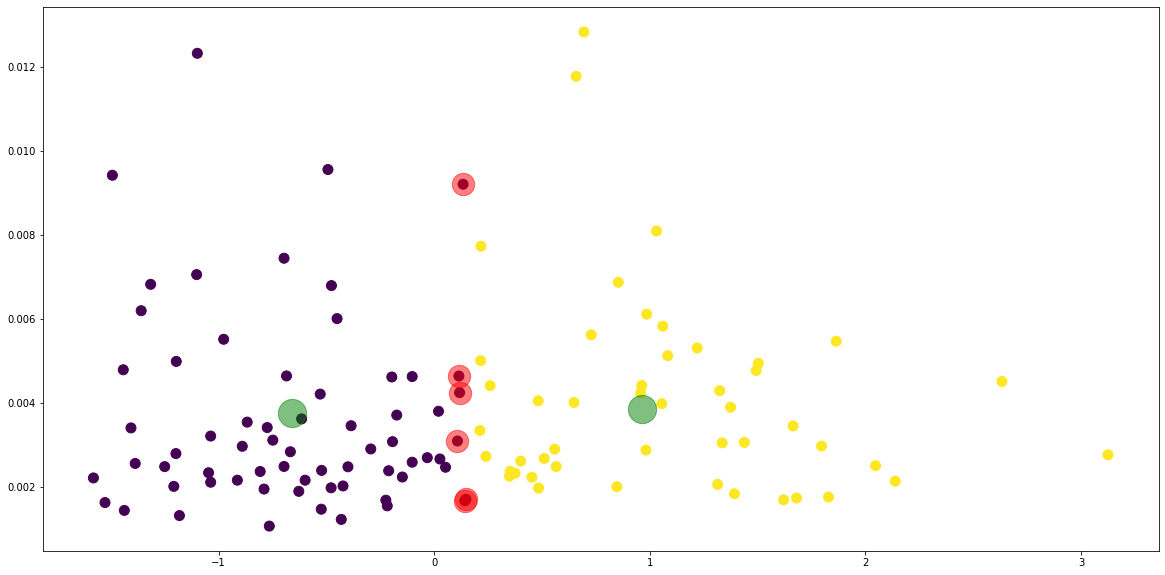

In [559]:
plt.figure(figsize=(20,10))
plt.scatter(X_test2.values[:, 0], X_test2.values[:, 1], c=labels_test, s=100, cmap='viridis')

mask_ = labels_test != my_y_pred2
disagreed_values = X_test2.values[mask_]
plt.scatter(disagreed_values[:, 0], disagreed_values[:, 1], c='red', s=500, alpha=0.5, cmap='viridis')

centers = clf3.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=800, alpha=0.5);
plt.show()

## Compare performance of best Kmeans model with the performance of Kmeans in sklearn library, using the same hyperparameters.

In [560]:
my_kmeans = KMeans(K=2, metric='L2', center_init='kmeans++', eps=1e-05)
print(my_kmeans)
my_kmeans.fit(X_train1.values)
my_clusters = my_kmeans.predict(X_train1.values)

my_labels = np.zeros_like(my_clusters)
for i in range(K):
    mask1 = (my_clusters == i)
    my_labels[mask1] = mode(y_train[mask1])[0]


KMeans object: metric=l2, center_init=kmeans++, K=2, max_iter=200, eps=1e-05
distortion:  2557.390934334497
distortion:  1126.977761148877
distortion:  1030.6488559917962
distortion:  975.8773269762435
distortion:  961.1866812582391
distortion:  958.2932401243027
distortion:  958.2825507627955
distortion:  958.9832842885131
distortion:  958.9832842885131
Required precision achieved on 7-th step


In [561]:
import sklearn.cluster
sklearn_kmeans = sklearn.cluster.KMeans(n_clusters=2, init='k-means++', max_iter=200, tol=1e-05)

sklearn_kmeans.fit(X_train1)
clusters_sklearn = sklearn_kmeans.predict(X_train1)

sklearn_labels = np.zeros_like(clusters_sklearn)
for i in range(K):
    mask2 = (clusters_sklearn == i)
    sklearn_labels[mask2] = mode(y_train[mask2])[0]

In [562]:
print(f'Accuracy of my KMeans: ', accuracy_score(y_train, my_labels))
print(f'Accuracy of Sklearn KMeans: ', accuracy_score(y_train, sklearn_labels))

Accuracy of my KMeans:  0.8631346578366446
Accuracy of Sklearn KMeans:  0.8631346578366446
